In [14]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [10]:
x = torch.unsqueeze(torch.linspace(-1 , 1, 100), dim=1)
y = x.pow(2)+0.2*torch.rand(x.size())
x, y = Variable(x), Variable(y)

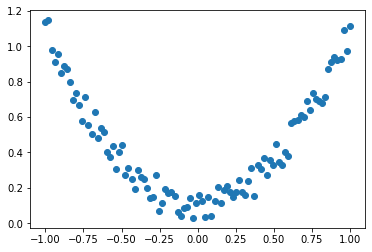

In [11]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [16]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super().__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [17]:
net = Net(1, 10, 1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [20]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
loss_func = torch.nn.MSELoss()

In [23]:
for t in range(100):
    prediction = net(x)
    
    loss = loss_func(prediction, y)
    loss.backward()
    optimizer.step()
    
    if t%5 == 0:
        print(loss)

tensor(0.1137, grad_fn=<MseLossBackward>)
tensor(0.1328, grad_fn=<MseLossBackward>)
tensor(0.1041, grad_fn=<MseLossBackward>)
tensor(0.0965, grad_fn=<MseLossBackward>)
tensor(0.1283, grad_fn=<MseLossBackward>)
tensor(0.1231, grad_fn=<MseLossBackward>)
tensor(0.0934, grad_fn=<MseLossBackward>)
tensor(0.1105, grad_fn=<MseLossBackward>)
tensor(0.1333, grad_fn=<MseLossBackward>)
tensor(0.1071, grad_fn=<MseLossBackward>)
tensor(0.0948, grad_fn=<MseLossBackward>)
tensor(0.1260, grad_fn=<MseLossBackward>)
tensor(0.1257, grad_fn=<MseLossBackward>)
tensor(0.0946, grad_fn=<MseLossBackward>)
tensor(0.1074, grad_fn=<MseLossBackward>)
tensor(0.1334, grad_fn=<MseLossBackward>)
tensor(0.1102, grad_fn=<MseLossBackward>)
tensor(0.0935, grad_fn=<MseLossBackward>)
tensor(0.1234, grad_fn=<MseLossBackward>)
tensor(0.1281, grad_fn=<MseLossBackward>)
